In [10]:
#ЗАДАНИЕ 2. Изучим данные
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75

In [11]:
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_data.shape

(53940, 10)

In [12]:
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
print(diamonds_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    52284 non-null  float64
 7   x        32058 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB
None


In [27]:
#ЗАДАНИЕ 3. Проверим наличие пропусков.
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_data.isna().sum()

carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price       1656
x          21882
y              0
z              0
dtype: int64

In [23]:
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_data[['price', 'x']].isnull().corr()

price        x
price  1.00000 -0.14419
x     -0.14419  1.00000

In [25]:
#ЗАДАНИЕ 4. Заполним пропуски средними значениями.
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_median = diamonds_data.copy()
diamonds_median.price.fillna(diamonds_median.price.median(), inplace = True)
diamonds_median.price.isna().sum()

0

In [26]:
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_median = diamonds_data.copy()
diamonds_median.x.fillna(diamonds_median.x.median(), inplace = True)
diamonds_median.x.isna().sum()

0

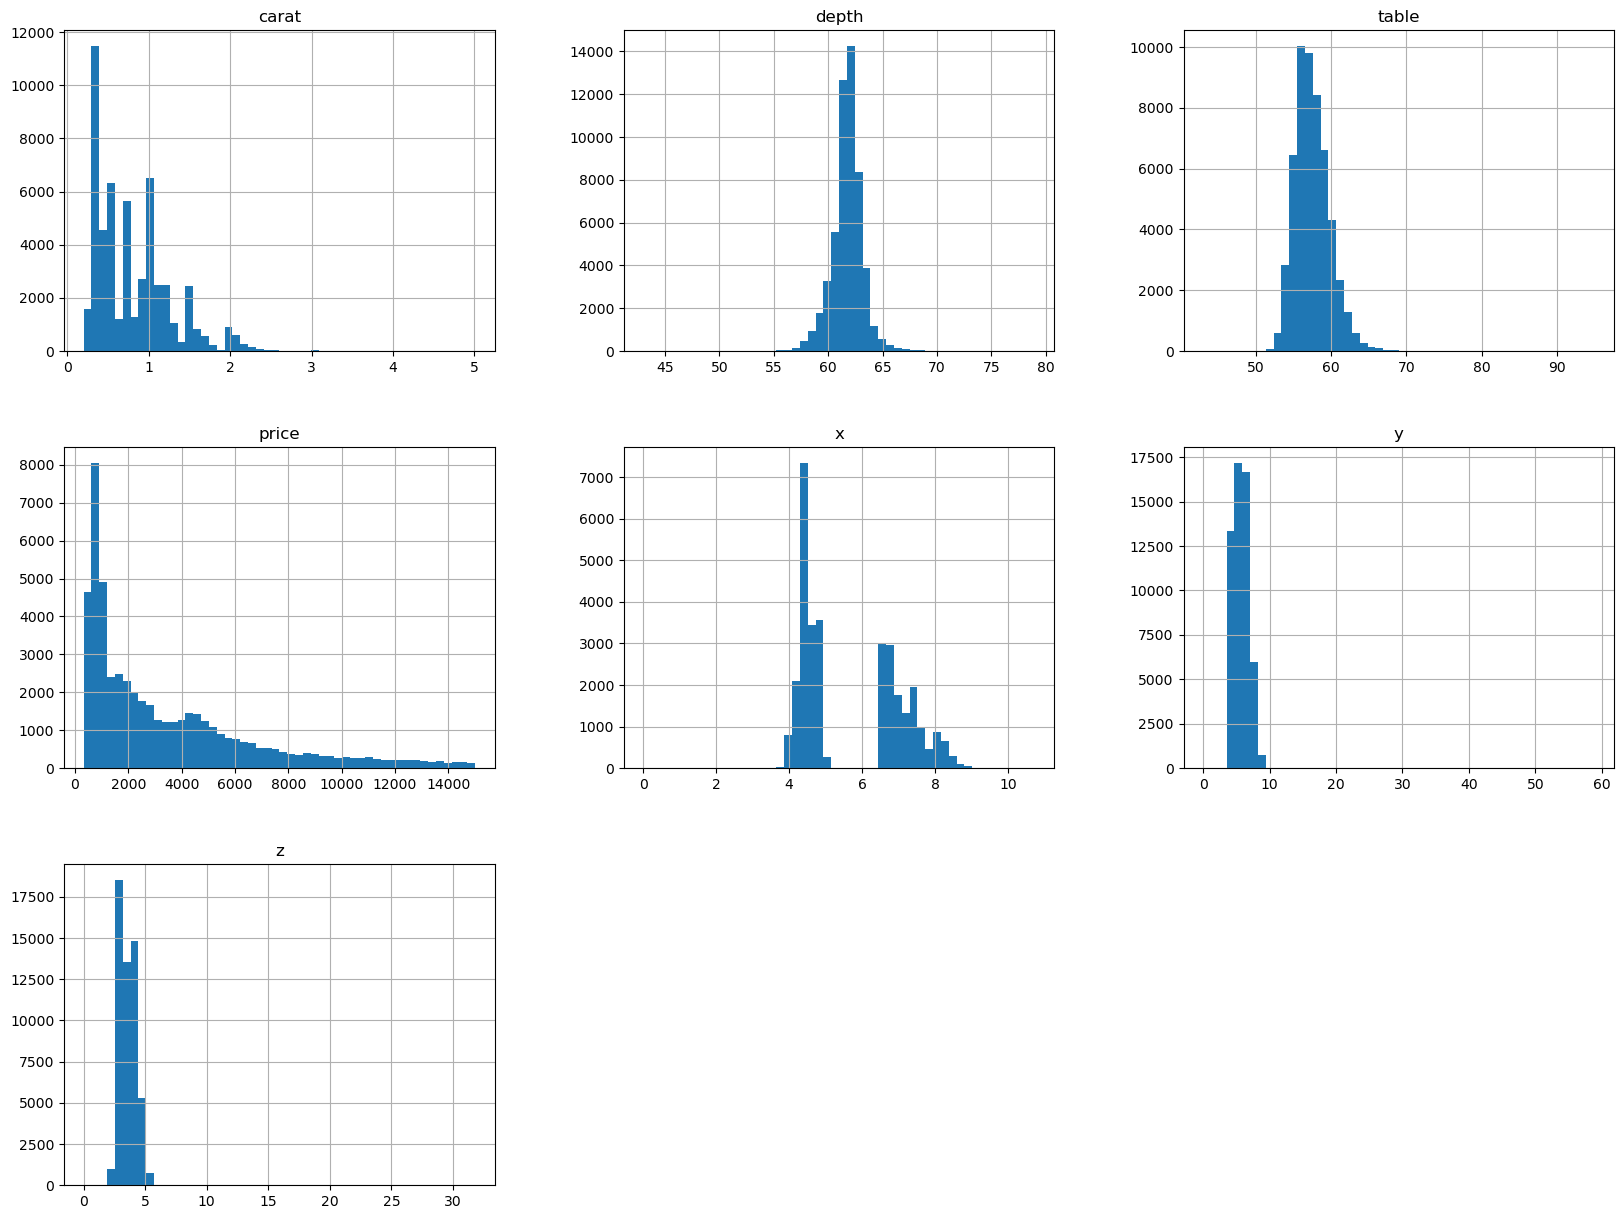

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_data.hist(figsize= (20,15) , bins = 50)
plt.show()


In [47]:
#ЗАДАНИЕ 5. Сгруппируем их по качеству и посчитаем среднюю цену, максимальный и минимальный карат.
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
diamonds_data.groupby('cut').agg(
    {'cut': 'count',
     'price': 'mean',
    'carat': ['max', 'min']})

cut        price carat      
           count         mean   max   min
cut                                      
Fair        1610  4036.728489  5.01  0.22
Good        4906  3581.869374  3.01  0.23
Ideal      21551  3119.839954  3.50  0.20
Premium    13791  4042.157831  4.01  0.20
Very Good  12082  3580.880154  4.00  0.20

In [68]:
#ЗАДАНИЕ 6. Сформулируем вывод, алмазов какого качества больше всего.
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
group_dmnd = diamonds_data.groupby('cut').agg({'cut': 'count','price': 'mean','carat': ['max', 'min']})
print(f"Больше всего алмазов качества: {group_dmnd['cut']['count'].max()}")
diamonds_data.groupby("cut")["cut"].count()
group_dmnd.loc[group_dmnd['cut'].idxmax()]

Больше всего алмазов качества: 21551


cut        price carat     
       count         mean   max  min
cut                                 
Ideal  21551  3119.839954   3.5  0.2

In [61]:
# Вычислим разницу в средней цене между Premium и ideal
import pandas as pd
import numpy as np
import dask.dataframe as dd

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")

filtered_df = diamonds_data[diamonds_data['cut'] == 'Premium']
aggregated_df = round(filtered_df['price'].mean())

filtered_df2 = diamonds_data[diamonds_data['cut'] == 'Ideal']
aggregated_df2 = round(filtered_df2['price'].mean())


print(aggregated_df - aggregated_df2)

922


In [8]:
#ЗАДАНИЕ 7. Сводная таблица по цвету и качеству со средним весом
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")
pivot_table = diamonds_data.pivot_table(index = ['color', 'cut'], values= ['carat'], aggfunc='mean')
pivot_table

carat
color cut                
D     Fair       0.920123
      Good       0.744517
      Ideal      0.565766
      Premium    0.721547
      Very Good  0.696424
E     Fair       0.856607
      Good       0.745134
      Ideal      0.578401
      Premium    0.717745
      Very Good  0.676317
F     Fair       0.904712
      Good       0.775930
      Ideal      0.655829
      Premium    0.827036
      Very Good  0.740961
G     Fair       1.023822
      Good       0.850896
      Ideal      0.700715
      Premium    0.841488
      Very Good  0.766799
H     Fair       1.219175
      Good       0.914729
      Ideal      0.799525
      Premium    1.016449
      Very Good  0.915948
I     Fair       1.198057
      Good       1.057222
      Ideal      0.913029
      Premium    1.144937
      Very Good  1.046952
J     Fair       1.341176
      Good       1.099544
      Ideal      1.063594
      Premium    1.293094
      Very Good  1.133215

In [4]:
# Отфильтруйте бриллианты с качеством Good
import pandas as pd
import numpy as np

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")

filtered_df = diamonds_data[diamonds_data['cut'] == 'Good']
filtered_df.head()

carat   cut color clarity  depth  table  price     x     y     z
2    0.23  Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
4    0.31  Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
10   0.30  Good     J     SI1   64.0   55.0  339.0  4.25  4.28  2.73
17   0.30  Good     J     SI1   63.4   54.0  351.0  4.23  4.29  2.70
18   0.30  Good     J     SI1   63.8   56.0  351.0  4.23  4.26  2.71

In [8]:
# Найдем среднюю, высоту, глубину и ширину для алмазов Good
import pandas as pd
import numpy as np
import dask.dataframe as dd

diamonds_data = pd.read_csv(r"C:\Users\Volot\Desktop\ЗАДАНИЯ\diamonds.csv")

filtered_df = diamonds_data[diamonds_data['cut'] == 'Good']
aggregated_df = filtered_df.groupby('cut').agg({'x': 'mean', 'y': 'mean', 'z': 'mean'})


print(aggregated_df)

             x         y         z
cut                               
Good  5.805333  5.850744  3.639507
